## 資料擷取與匯入-CSV

In [1]:
import pandas as pd

df1 = pd.read_csv("103opendata.csv",encoding = "big5")
del df1['A12A'],df1['A12B'],df1['A12B1'],df1['A12B2A'],df1['A12B2B'],df1['A12B2C'],df1['A12B2C2'],df1['A12B3A'],df1['A12B3B'],df1['A12B3C'],df1['A12B3C2'],df1['A12C']
#df1[:20]

## 資料預處理-轉換

In [2]:
bins=[0,50,250,550,1500]  #將機車以cc數分級 S=small,N=normal,Y=yellow,R=red
labels=['S','N','Y','R']
df1['label'] = pd.cut(df1['cc'],bins,right=False,labels=labels)
#df1[:20]

## 資料聚合與樞紐分析-樞紐分析

In [3]:
df2 =df1
df2=df2.rename(columns={'F9_area':'地區','label':'機車量級'})

to_area={1:'北部地區',2:'中部地區',3:'南部地區',4:'東部地區',5:'金馬地區'}
df2['地區'] = df2['地區'].map(to_area)

# 在各縣市當中，不同CC數的騎士，平均每星期使用幾天
df2.pivot_table(values="B8A",index=['機車量級'],columns='地區',aggfunc="mean")

#df2[:20]

地區,中部地區,北部地區,南部地區,東部地區,金馬地區
機車量級,,,,,
N,5.736527,5.529859,5.878598,5.567901,5.000000
R,2.294118,2.474164,2.504587,2.166667,4.000000
S,4.923944,4.737194,5.167347,4.562500,5.222222
Y,3.992754,4.012658,3.542636,4.095238,5.000000


In [4]:
# 在各縣市當中，不同CC數的騎士，一天平均使用幾次機車(來回算一次)
df2.pivot_table(values="B8B",index=['機車量級'],columns='地區',aggfunc="mean")

地區,中部地區,北部地區,南部地區,東部地區,金馬地區
機車量級,,,,,
N,2.020267,1.883822,2.146863,2.117284,2.285714
R,1.375000,1.398176,1.330275,1.291667,0.000000
S,1.808451,1.710468,1.861224,1.375000,2.222222
Y,1.782609,1.726582,1.720930,2.000000,2.500000


In [5]:
# 在各縣市當中，不同CC數的騎士，家裡有幾台機車
df2.pivot_table(values="F7A",index=['機車量級'],columns='地區',aggfunc="mean")

地區,中部地區,北部地區,南部地區,東部地區,金馬地區
機車量級,,,,,
N,2.081990,1.869164,2.164945,1.907407,1.767857
R,2.345588,2.319149,2.642202,2.666667,3.000000
S,2.050704,1.797327,1.957143,1.625000,1.555556
Y,2.202899,2.268354,2.534884,2.095238,1.500000


In [6]:
to_real={0:0,1:0,2:1,3:2,4:3,5:4}
df2['F7B'] = df2['F7B'].map(to_real)

In [7]:
# 在各縣市當中，不同CC數的騎士，家裡有幾台汽車
#print(df2['F7B'])
df2.pivot_table(values='F7B',index=['機車量級'],columns='地區',aggfunc="mean")

地區,中部地區,北部地區,南部地區,東部地區,金馬地區
機車量級,,,,,
N,0.909258,0.696254,0.785978,0.882716,0.678571
R,1.235294,1.221884,1.302752,1.416667,1.000000
S,0.954930,0.677060,0.702041,0.750000,0.777778
Y,1.246377,1.007595,1.015504,0.952381,0.500000


## 資料分析方法-描述性統計

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='DFKai-SB' 

df3=pd.DataFrame({'薪水1':df1['F6'],'薪水2':df1['F6O']})

to_Num={0:0,1:5000,2:10000,3:20000,4:30000,5:40000,6:50000,7:60000,8:70000,9:0}
df3['薪水1'] = df3['薪水1'].map(to_Num)
df3['薪水'] = df3['薪水1']+df3['薪水2']*10000

df3['薪水'].describe()

count     11409.000000
mean      31973.442019
std       23826.587138
min           0.000000
25%       10000.000000
50%       30000.000000
75%       40000.000000
max      500000.000000
Name: 薪水, dtype: float64

## 資料分析方法-相關性分析

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='DFKai-SB' 

df4=pd.DataFrame({'薪水':df3['薪水'],'擁有機車數':df1['F7A'],'機車量級':df1['cc'],'平均每日機車使用次數':df1['B8B'],'擁有汽車數':df2['F7B'],'年齡':df1['F3']})
df4.corr()

,平均每日機車使用次數,年齡,擁有機車數,擁有汽車數,機車量級,薪水
平均每日機車使用次數,1.000000,-0.032005,0.013330,-0.020626,-0.109481,-0.035829
年齡,-0.032005,1.000000,0.061974,0.046542,-0.034412,-0.061140
擁有機車數,0.013330,0.061974,1.000000,0.325580,0.084420,0.046548
擁有汽車數,-0.020626,0.046542,0.325580,1.000000,0.146683,0.145300
機車量級,-0.109481,-0.034412,0.084420,0.146683,1.000000,0.207761
薪水,-0.035829,-0.061140,0.046548,0.145300,0.207761,1.000000


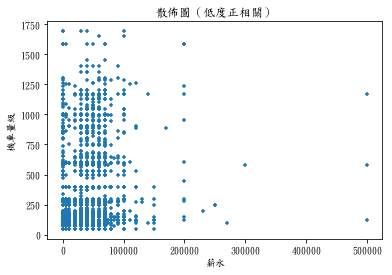

In [10]:
df4.plot(kind='scatter',title='散佈圖（低度正相關）',figsize=(6,4),x='薪水',y='機車量級',marker='+')
#因問卷型式的資料內容參差不齊，在做相關性分析會影響相關性

## 資料分析方法-購物籃分析

In [11]:
df5=pd.DataFrame({'每星期使用幾天':df1['B4'],'平均一天使用多少公里':df1['B6']})
df6=pd.DataFrame({'機車等級':df1['label']})
#df5[:10]

In [12]:
bins1=[0,3,8]  #0=沒使用 3=使用兩天 8=使用7天
bins2=[0,3,5,8,9] #3=小於5公里 5=小於15公里 8=小於40公里 9=大於40公里

labels1=['F','U']  #F=few(0~2天) U=usually(3~7天)
labels2=['less_5','less_15','less_40','higher_40'] # ~5公里; 5~15公里; 15~40公里; 40~公里

df6['使用頻率'] = pd.cut(df5['每星期使用幾天'],bins1,right=True,labels=labels1)
df6['使用距離'] = pd.cut(df5['平均一天使用多少公里'],bins2,right=True,labels=labels2)
#df6[:10]

In [13]:
df6[:5000].to_csv("basketAnalysis.csv")  #因運算時間關係，只取樣到5000個數據
!python apriori.py -f basketAnalysis.csv -s 0.3 -c 0.5

item: ('less_5',) , 0.307
item: ('less_40',) , 0.315
item: ('U', 'N') , 0.659
item: ('N',) , 0.774
item: ('U',) , 0.787

------------------------ RULES:
Rule: ('U',) ==> ('N',) , 0.837
Rule: ('N',) ==> ('U',) , 0.851


## 視覺化-圓餅圖

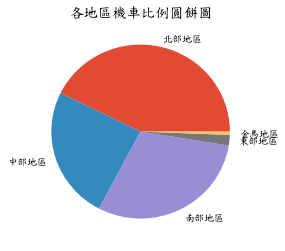

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')

%matplotlib inline
plt.rcParams['font.family']='DFKai-SB' 

#計算機車各使用地區之數量
A=0
B=0
C=0
D=0
E=0
df7=pd.DataFrame({'機車使用地區':df1['F9_area'],'機車量級':df1['label']})
for index,row in enumerate(df7['機車使用地區']):
    if row == 1:
        A+=1
    elif row == 2:
        B+=1
    elif row == 3:
        C+=1
    elif row == 4:
        D+=1
    elif row == 5:
        E+=1

labels = ['北部地區','中部地區','南部地區','東部地區','金馬地區']
y = [A,B,C,D,E]
plt.figure(figsize=(4,4))
plt.title('各地區機車比例圓餅圖')
plt.pie(y,labels=labels)
plt.show()
#df7[:10]

## 視覺化-長條圖

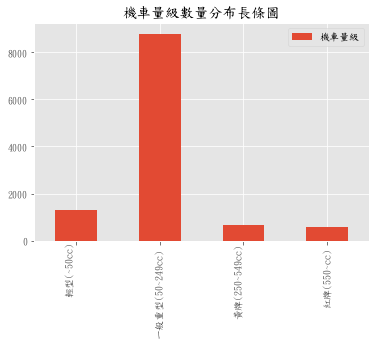

In [15]:
#計算機車各量級之數量
A=0
B=0
C=0
D=0
for index,row in enumerate(df7['機車量級']):
    if row == 'S':
        A+=1
    elif row == 'N':
        B+=1
    elif row == 'Y':
        C+=1
    elif row == 'R':
        D+=1
df8=pd.DataFrame({'機車量級':[A,B,C,D]},index=['輕型(~50cc)','一般重型(50~249cc)','黃牌(250~549cc)','紅牌(550~cc)'])
df8.plot(kind='bar',title='機車量級數量分布長條圖',figsize=(6,4),stacked=True)

## 基礎機器學習- K-means分群與視覺化

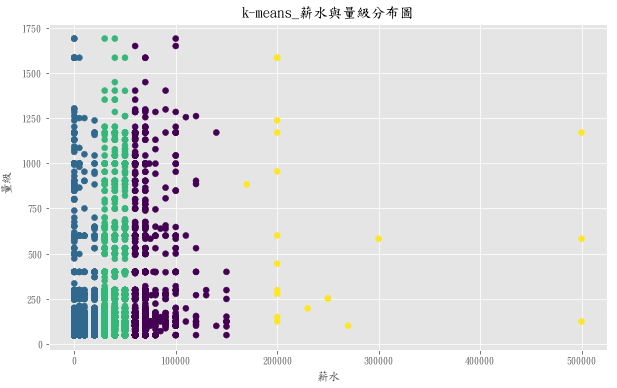

In [16]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' 

df9=pd.DataFrame({'薪水':df3['薪水'],'量級':df1['cc']})

df9.薪水 = df9.薪水.astype(float)                   
df9.cc = df9.量級.astype(float)              
X = df9[['薪水','量級']].values                

km = KMeans(n_clusters=4) 

y_pred = km.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.xlabel('薪水')
plt.ylabel('量級')
plt.title('k-means_薪水與量級分布圖')
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

#由於薪水的橫向向度是不連續性的資料，因此容易造成在決定資料群時，是以直向切割資料群
#可以發現藍色的資料群最集中，因為以薪水做描述性統計，其平均值落在32000左右

#且以量級500作為分界，從紫色-藍色-綠色-黃色，500以上的資料群比例逐漸增多

#可發現紫色與藍色的交界介於月薪三萬左右，接近一般家庭個人的薪資水準
#可發現藍色與綠色的交界介於月薪六萬左右，接近小康家庭的個人薪資水準
#可發現綠色與黃色的交界介於年薪百萬左右，接近較富裕家庭的個人薪資水準
#以上三個分界，是相當有現實的實際意義的數據

## 補充資料

In [17]:
#各地區平均薪水
df10=pd.DataFrame({'地區':df2['地區'],'薪水':df3['薪水']})
df10=df10.groupby('地區').mean()
df10[:]

,薪水
地區,
中部地區,29519.457337
北部地區,35252.974969
南部地區,29303.400174
東部地區,31547.085202
金馬地區,34428.571429
